In [1]:
##Predict if patients are susceptible in going through REM sleep

In [2]:
# import file

import csv

file_path = "datasets\\data2.csv"

with open(file_path, 'r') as csv_file:
    reader = csv.reader(csv_file)

In [3]:
# import packages

import datetime
import os
import collections

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_recall_curve,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [4]:
dataset_file = file_path
df = pd.read_csv(dataset_file)
df.shape

(452, 13)

In [5]:
pd.set_option('display.max_columns', None)
print(df.head(5))
print(df.tail(5))

   Unnamed: 0  Age  Gender  Sleep duration  Sleep efficiency  \
0           0   65       1             6.0              0.88   
1           1   69       0             7.0              0.66   
2           2   40       1             8.0              0.89   
3           3   40       1             6.0              0.51   
4           4   57       0             8.0              0.76   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0                    18                     70                      12   
1                    19                     28                      53   
2                    20                     70                      10   
3                    23                     25                      52   
4                    27                     55                      18   

   Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  \
0         0.0                   0.0                  0.0               1   
1         3.0     

In [6]:
# features extracted for the models

X_df = df.drop(['Unnamed: 0', 'Age', 'Gender', 'Light sleep percentage', 'Deep sleep percentage'], axis = 1)
y_df = df['REM sleep percentage']

In [7]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 50)

In [8]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 50)

In [9]:
X_train.shape, X_test.shape

((361, 8), (91, 8))

In [10]:
Counter(y_train), Counter(y_test)

(Counter({20: 72,
          28: 49,
          22: 49,
          23: 47,
          18: 39,
          25: 27,
          24: 22,
          27: 20,
          26: 12,
          15: 10,
          30: 7,
          19: 6,
          21: 1}),
 Counter({20: 20,
          22: 18,
          18: 10,
          23: 9,
          28: 9,
          27: 5,
          19: 5,
          25: 4,
          15: 4,
          24: 4,
          26: 3}))

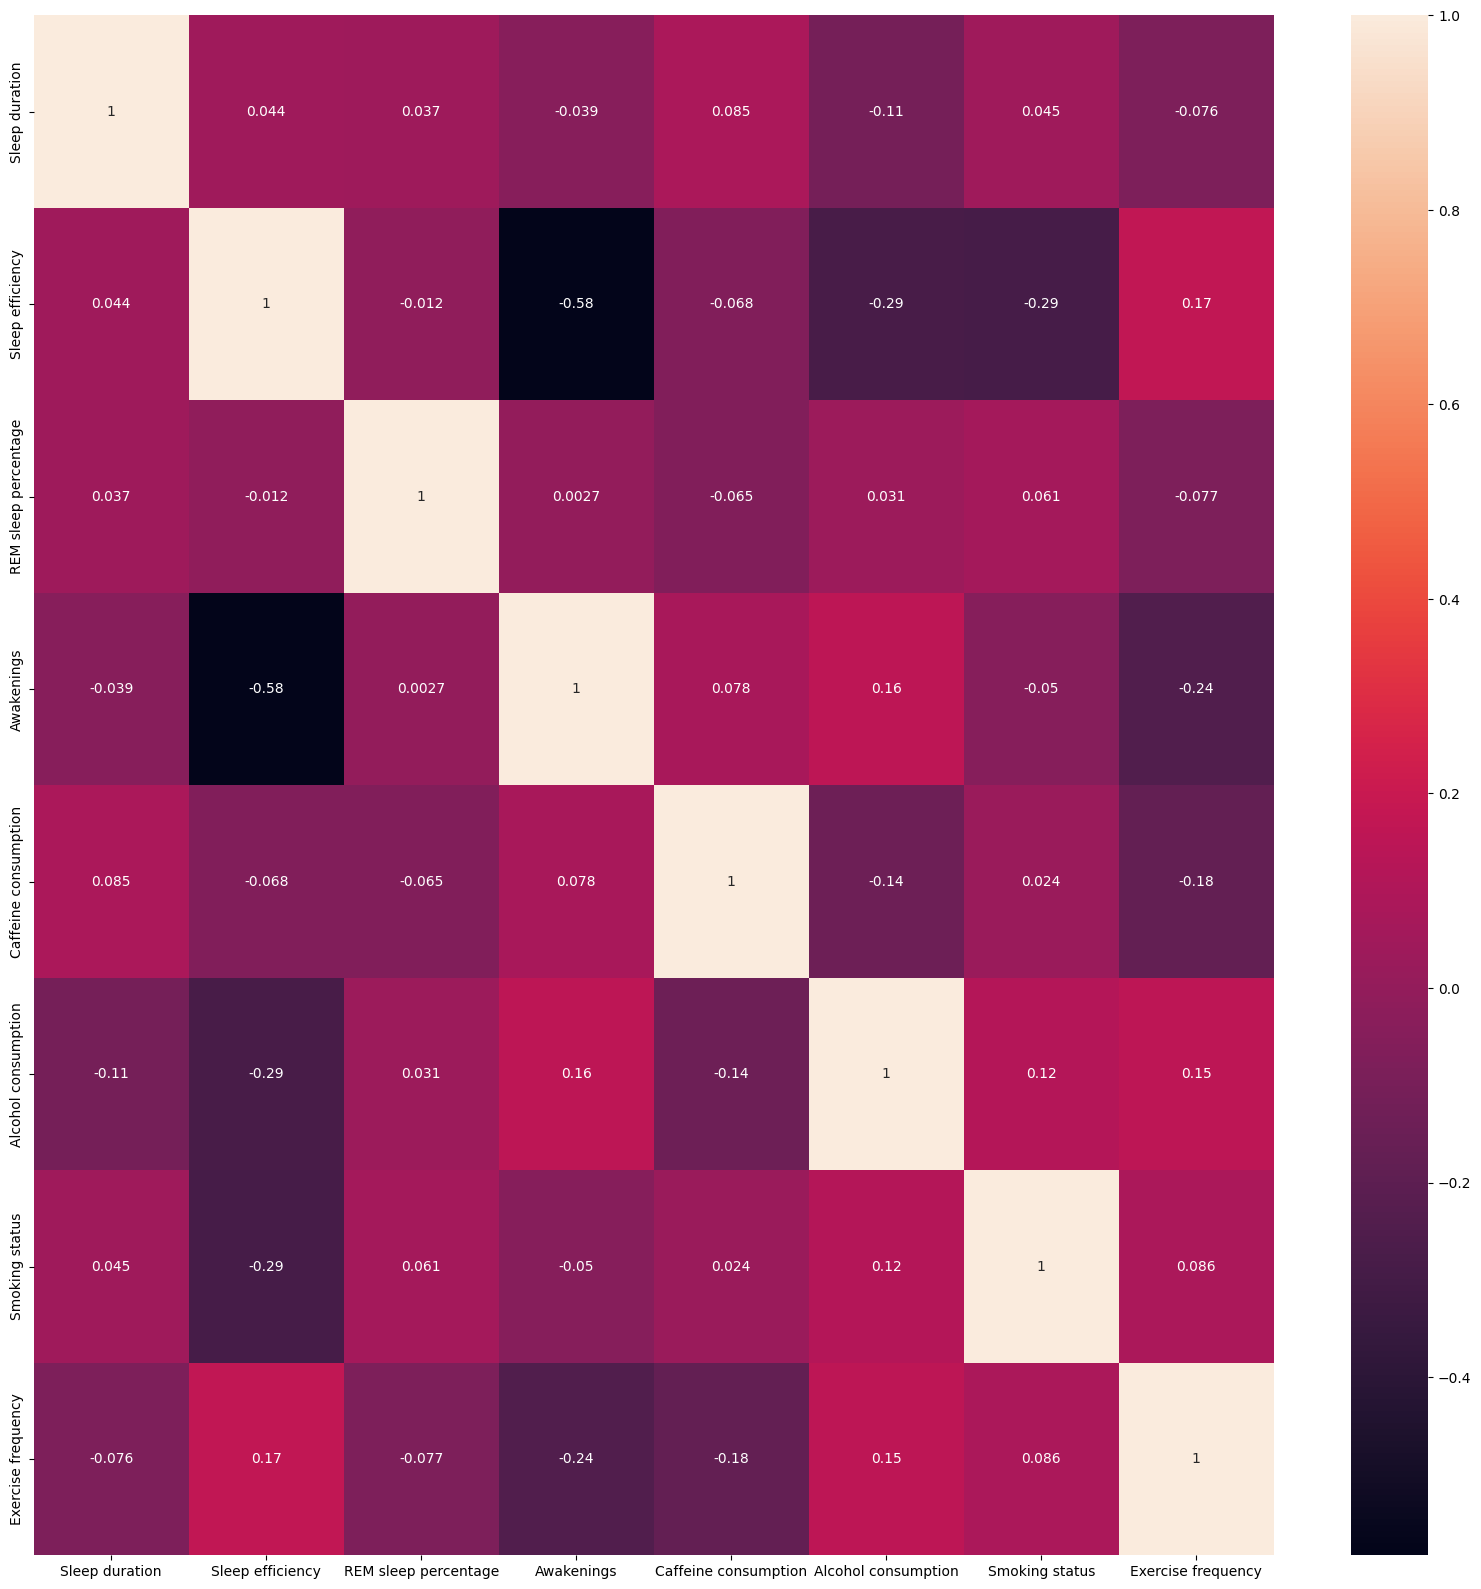

In [11]:
# performing a correlation matrix

corr_matrix = X_test.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [12]:
# logistic regression

lr_model = LogisticRegression(max_iter = 5000)
lr_model.fit(X_train, y_train)

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [13]:
y_pred = lr_model.predict(X_test)

accuracy = lr_model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8461538461538461


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          15       1.00      0.75      0.86         4
          18       0.91      1.00      0.95        10
          19       0.00      0.00      0.00         5
          20       0.80      1.00      0.89        20
          22       0.94      0.83      0.88        18
          23       0.64      0.78      0.70         9
          24       0.50      0.75      0.60         4
          25       1.00      0.50      0.67         4
          26       1.00      1.00      1.00         3
          27       1.00      1.00      1.00         5
          28       1.00      1.00      1.00         9

    accuracy                           0.85        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.82      0.85      0.82        91



C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

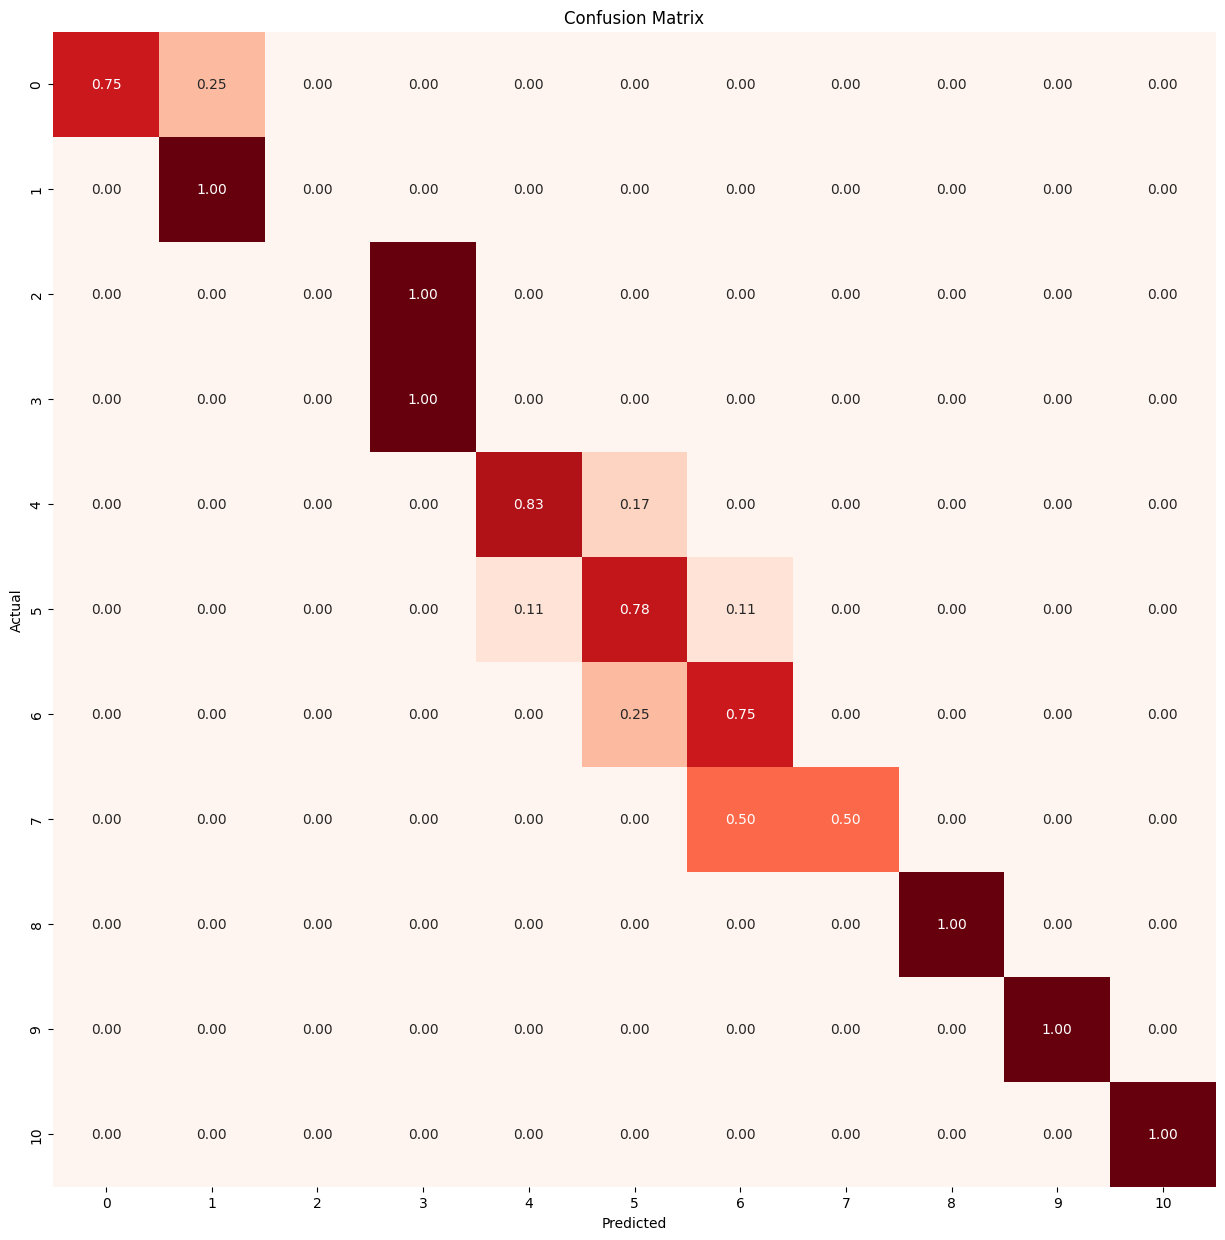

In [15]:
# confusion matrix on logistic regression

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [16]:
# K-Nearest Neighbors

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6923076923076923


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          15       1.00      0.25      0.40         4
          18       0.70      0.70      0.70        10
          19       0.00      0.00      0.00         5
          20       0.69      1.00      0.82        20
          22       0.86      0.67      0.75        18
          23       0.50      0.67      0.57         9
          24       0.25      0.25      0.25         4
          25       0.50      0.75      0.60         4
          26       1.00      0.33      0.50         3
          27       0.80      0.80      0.80         5
          28       0.89      0.89      0.89         9

    accuracy                           0.69        91
   macro avg       0.65      0.57      0.57        91
weighted avg       0.69      0.69      0.66        91



C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [26]:
# cross validation on k-nearest neighbors using Stratified K-Folds

knn = KNeighborsClassifier()

num_folds = 5

stratified_kfold = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = 50)

accuracy_scores = []

X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

for train_index, test_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    knn.fit(X_train_fold, y_train_fold)

    y_pred_fold = knn.predict(X_test_fold)

    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Mean Accuracy: 0.7037
Standard Deviation of Accuracy: 0.0588


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


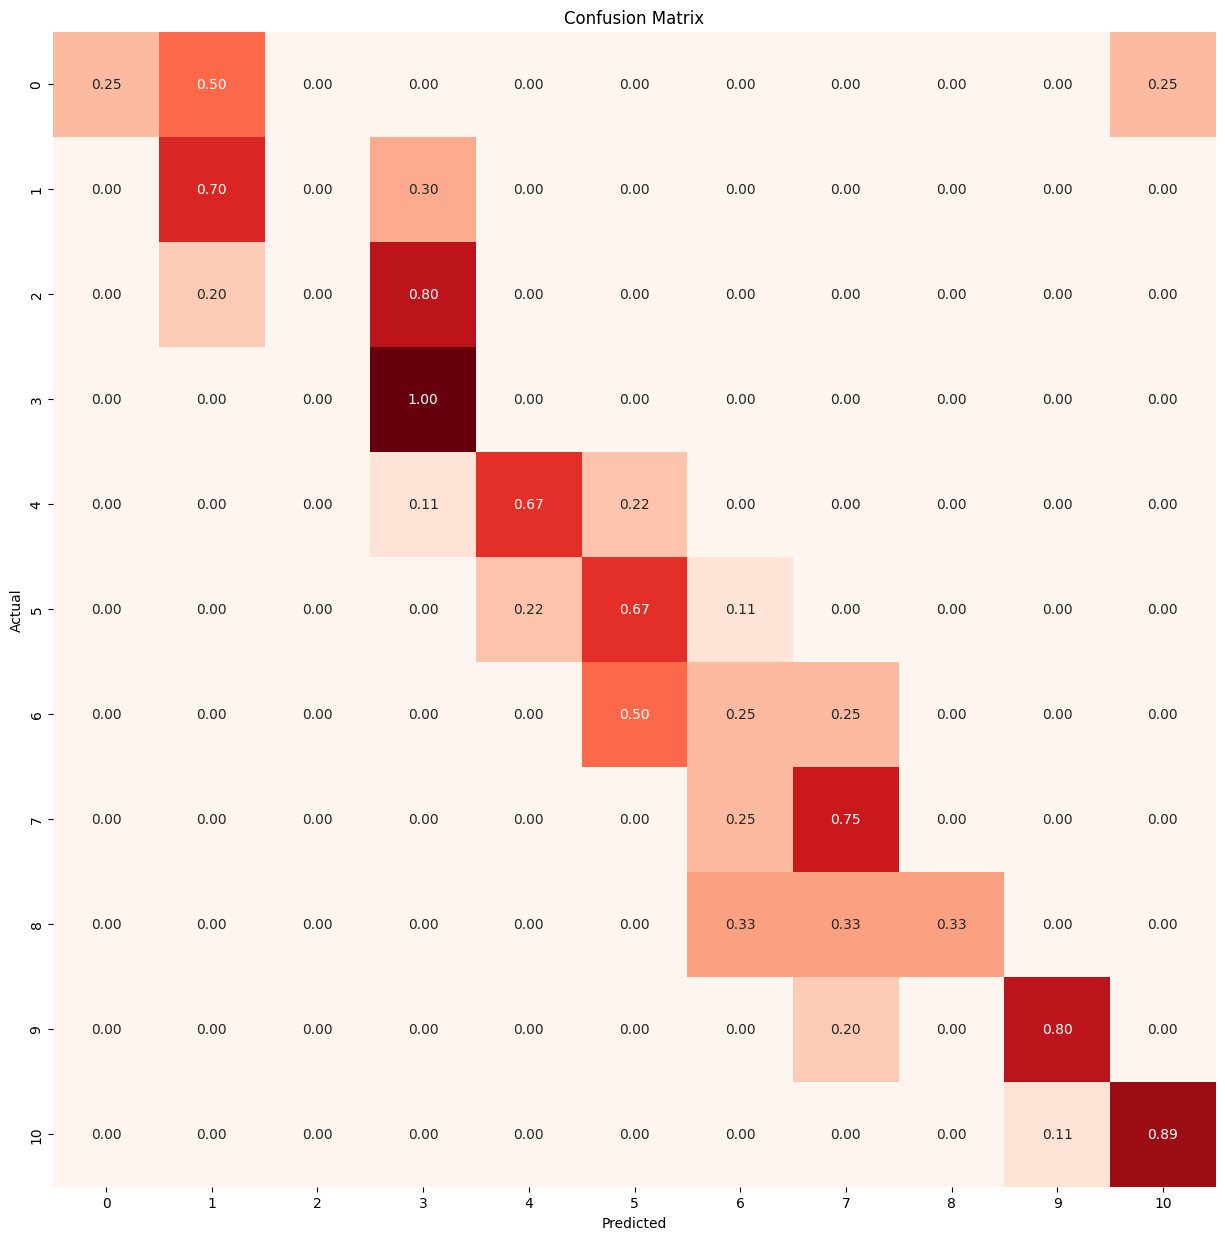

In [20]:
# confusion matrix on k-nearest neighbors

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot=True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')

In [21]:
# random forest

rfc = RandomForestClassifier(n_estimators = 50, random_state = 25)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=25)

In [22]:
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8461538461538461


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          15       1.00      0.25      0.40         4
          18       0.64      0.90      0.75        10
          19       1.00      0.40      0.57         5
          20       0.91      1.00      0.95        20
          22       1.00      1.00      1.00        18
          23       0.75      1.00      0.86         9
          24       0.50      0.25      0.33         4
          25       0.50      0.50      0.50         4
          26       1.00      0.67      0.80         3
          27       0.80      0.80      0.80         5
          28       1.00      1.00      1.00         9

    accuracy                           0.85        91
   macro avg       0.83      0.71      0.72        91
weighted avg       0.86      0.85      0.83        91



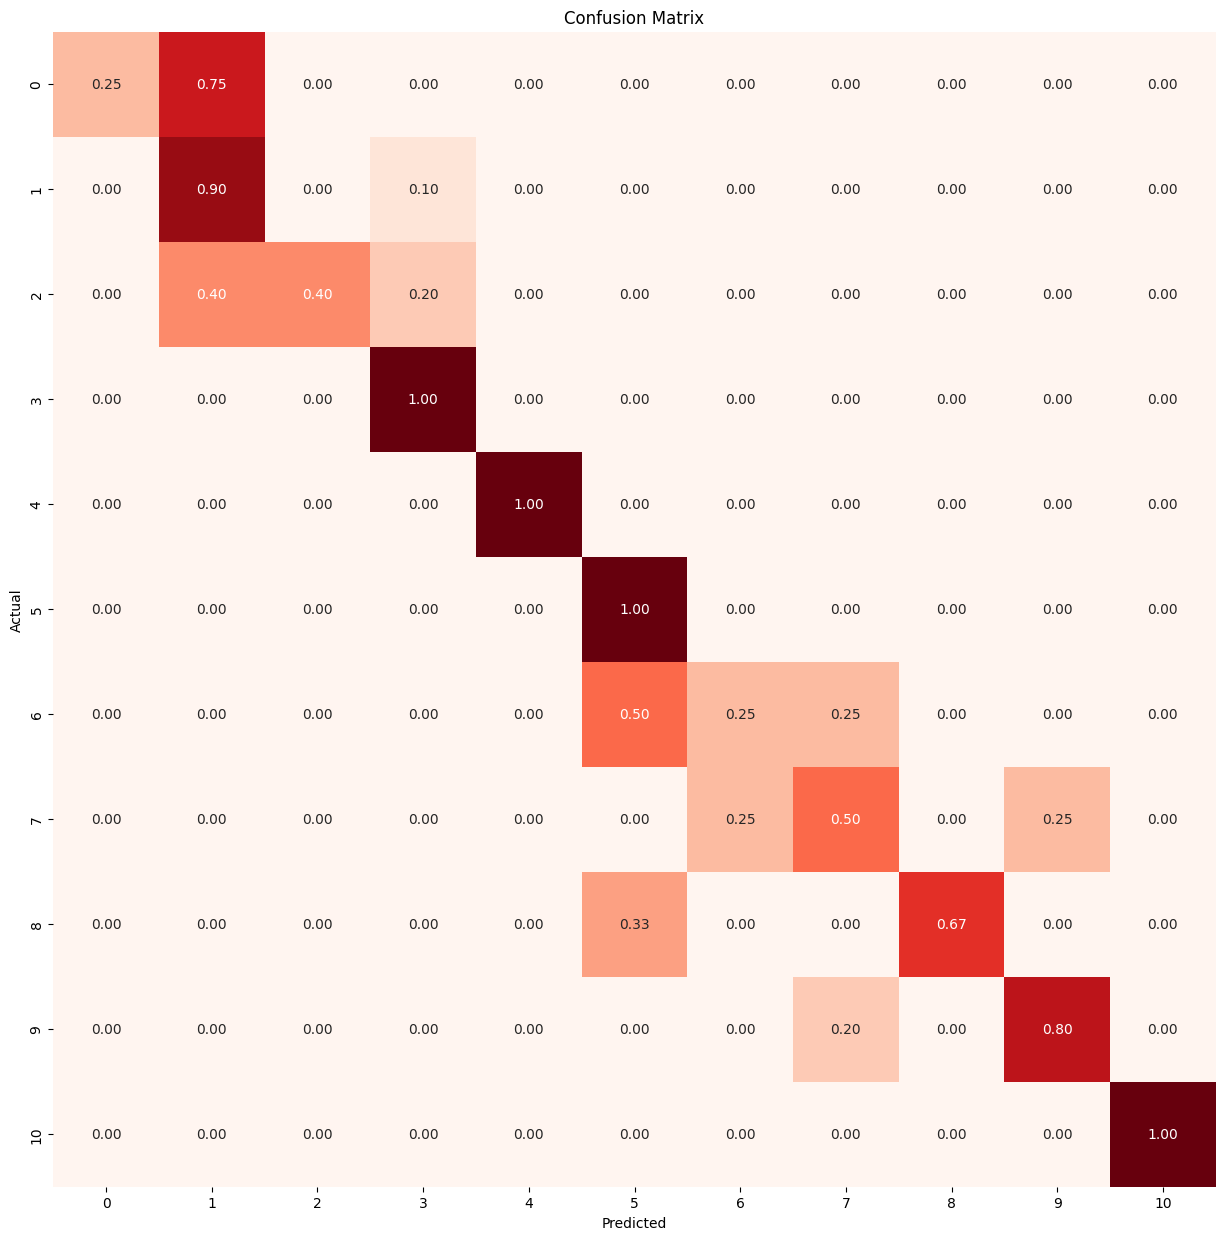

In [24]:
# confusion matrix on random forest

def plot_confusion_matrix(cm, show_absolute = True, show_normed = False, cmap = 'Reds'):
    plt.figure(figsize = (15, 15))

    if show_normed:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    sns.heatmap(cm, annot = True, fmt = '.2f' if show_normed else 'd', cmap = cmap, cbar = False)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.show()

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, show_absolute = True, show_normed = True, cmap = 'Reds')